In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('c:/Users/pavel/Documents/Data/ad.csv')
df

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1
...,...,...
1995,A,0
1996,A,0
1997,A,0
1998,A,1


In [17]:
import seaborn as sns

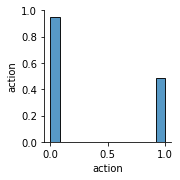

In [18]:
sns.pairplot(df)

In [3]:
pd.crosstab(df['ad_id'], df['action'])

action,0,1
ad_id,,
A,696,304
B,628,372


In [4]:
pd.crosstab(df['ad_id'], df['action'], normalize = True)

action,0,1
ad_id,,
A,0.348,0.152
B,0.314,0.186


In [5]:
n1 = 1000
n2 = 1000
p1 = 304 / n1
p2 = 372 / n2

In [6]:
print(p1, p2)

0.304 0.372


In [7]:
#расчет пропорции для смешаных дата сетов
p_hat = (304 + 372) / (n1 + n2)
p_hat

0.338

In [8]:
#N0: p2 = p1, или что тоже самое p2 - p1 = 0
#N1: p2 > p1
p2 - p1

0.068

In [9]:
#расчет дисперсии
var = p_hat * (1 - p_hat) * (1 / n1 + 1 / n2)
var

0.00044751199999999995

In [10]:
import numpy as np

In [11]:
#рассчитаем стандартное отклонение
se = np.sqrt(var)
se

0.02115447943108031

In [12]:
# рассчитаем Т тест, Т критерий Стьюдента
t_score = (p2 - p1) / se
t_score

3.2144492244084213

In [13]:
# рассчитаем вероятность для Т распределения
import scipy.stats as stats

In [14]:
# для примера рассчитаем вероятность в нормальном распределении
stats.norm.cdf(t_score)

0.9993465248633937

In [15]:
# рассчитаем вероятность для Т распределения
stats.t.cdf(t_score, df = n1 + n2 - 2)

0.9993361021619558

In [16]:
p_value = 1 - stats.t.cdf(t_score, df = n1 + n2 - 2)
p_value

0.000663897838044214

In [27]:
alpha = 0.05
p_value > alpha

False